<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/Encoder_and_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encoder and Decoder**


Imagine you're sending a secret message to your friend, and you want to make sure nobody else can understand it. You can use two special machines to do this: **an encoder and a decoder.**

**Encoder:**

The encoder is like a machine that takes your message (which could be a picture, a sentence, or anything) and turns it into a secret code. It's like putting your message into a box with a lock, and the encoder creates the key.

In deep learning, an encoder is a part of a neural network that takes some data, like an image or text, and converts it into a different format. This new format is designed to capture important information about the input data in a more compact and abstract way. The idea is to make it harder for anyone to understand the original data but still keep its essential features.

**Decoder:**

The decoder is the machine your friend has. It takes the secret code you sent and uses the key to unlock it, revealing the original message. It's like opening the box with the key you created with the encoder.

In deep learning, a decoder is another part of a neural network that takes the encoded data and turns it back into something that's more understandable, like an image or text. It's designed to reconstruct the original data from the code created by the encoder.

The encoder and decoder are often used together in a type of deep learning model called an **"autoencoder."** Autoencoders are used for various tasks, like image compression, denoising, and even generating new data that's similar to the input data.

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 6s 19ms/step - loss: 0.4090 - val_loss: 0.3393
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3216 - val_loss: 0.3159
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3108 - val_loss: 0.3105
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3068 - val_loss: 0.3078
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.3042 - val_loss: 0.3053
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3021 - val_loss: 0.3035
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3005 - val_loss: 0.3018
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2993 - val_loss: 0.3007
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2983 - val_loss: 0.2998
Epoch 10/50
235/235 [=======

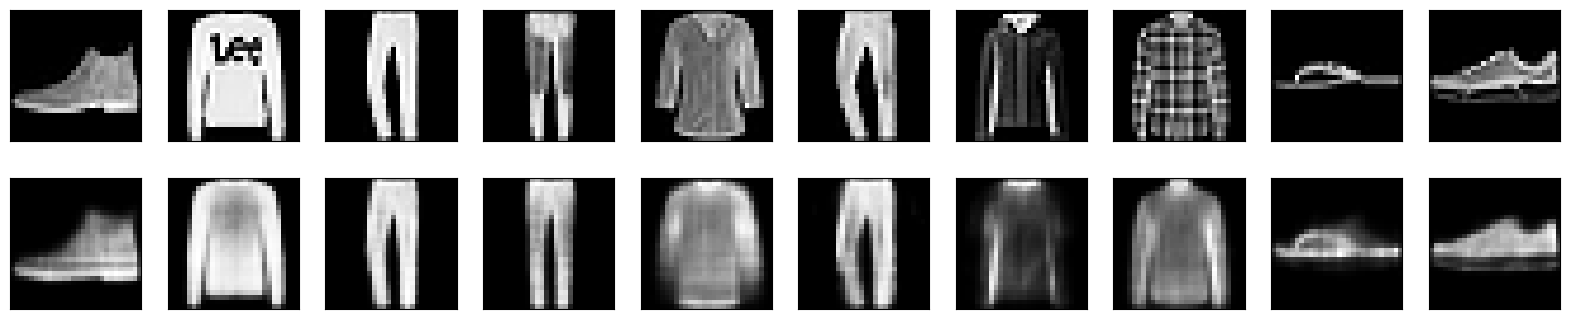

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset as an example
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and prepare the data (values between 0 and 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Build an autoencoder model
input_img = keras.Input(shape=(28, 28, 1))

# Encoder
x = layers.Flatten()(input_img)
x = layers.Dense(32, activation="relu")(x)
encoded = layers.Dense(16, activation="relu")(x)

# Decoder
x = layers.Dense(32, activation="relu")(encoded)
x = layers.Dense(784, activation="sigmoid")(x)
decoded = layers.Reshape((28, 28, 1))(x)

autoencoder = keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode the test images
encoded_images = autoencoder.predict(x_test)

# Display some original and autoencoded images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Autoencoded Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


**Auto Encoder model**

We define the architecture of the autoencoder model. It consists of an encoder and a decoder.


**Dimensionality Reduction:**

The encoder part of the autoencoder takes the original 28x28 pixel images and compresses them into a lower-dimensional representation. In this case, it reduces the dimension from 784 (28x28) to 16.


This dimensionality reduction can be useful for various purposes, such as feature extraction. It captures essential features of the input images in a more compact form. For example, in the Fashion MNIST dataset, it might capture the basic shapes and patterns of the fashion items.


**Image Reconstruction:**

The decoder part of the autoencoder takes the compressed representation (16 dimensions) and reconstructs the original 28x28 pixel images.
By training the autoencoder on the same data as both input and target, the model learns to recreate the original images as accurately as possible.


This reconstruction process can be valuable for tasks like image denoising or image inpainting. If an image is partially damaged or contains noise, the autoencoder can be used to restore it to a cleaner version.

**Loss function**

The loss function used in the autoencoder code is binary cross-entropy, also known as binary log loss or binary logistic loss. This loss function is commonly used in autoencoders when treating the problem as a pixel-wise binary classification problem.

In the context of the autoencoder, each pixel in the image is treated as a separate binary classification problem. The task is to predict whether each pixel should be white (1) or black (0).

**Applications of autoencoders**

**Data Denoising:**

Autoencoders can be trained to remove noise from data. When presented with noisy data, they can reconstruct a cleaner version, making them useful for image denoising, signal denoising, and more.

**Image Super-Resolution:**

Autoencoders can be trained to upscale low-resolution images to higher resolutions. This is useful for improving the quality of images in applications like image processing and medical imaging.

**Image Generation:**

Variational autoencoders (a type of autoencoder) are used for generating new data samples that are similar to the training data. This is employed in applications like generative art and generating new images from a given dataset.

**Speech Recognition and Generation:**

Autoencoders are employed in tasks like speech recognition and synthesis, where they model audio signals and their characteristics.